# Predictive Modeling
Shane Boyce
WGU MSDA - D208
Part 1: Linear Regression in Python

## INTRODUCTION
As a data analyst, you will assess continuous data sources for their relevance to specific research questions throughout your career.



In your previous coursework, you have performed data cleaning and exploratory data analysis on your data. You have seen basic trends and patterns and now can start building more sophisticated statistical models. In this course, you will use and explore both multiple regression and logistic regression models and their assumptions.

Data Sets and Associated Data Dictionaries

## Part I: Research Question

### A.  Describe the purpose of this data analysis:

In the explarotatory data analysis phase, a few statistical tests were run in relationship to `churn`. The previous phase highlighted a statistically significant relationship between `Churn` and [`NonthlyCharge`,`Bandwidth_Gb_year`,`Tenure`]. Though an analysis of all contributing numeric types will be performed to gather insights on all 3 of these features, the primary research question is: What variables influence a customer's `Tenure`. The longer the `Tenure` of a customer, the less likely they were to churn and understanding the features that contribute to long term tenure will help to ensure business decisions and processes can match the goal of unbcreasing customer longevity. 


#### 1.  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple regression.

$H$<sub>0</sub>: No feature combinations contribute to `Tenure` length

$H$<sub>1</sub>: Some combination of features contribute to `Tenure` length 

#### 2.  Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.

The primary objective is to determine which, if any, continuous numeric features contribute to increasing `Tenure`.

Null hypothesis: H0: $\beta$1 = $\beta$2 = … = $\beta$<sub>p</sub> = 0

Alternative hypothesis: H<sub>$1$</sub>: at least one $\beta$<sub>i</sub> ≠ 0 (i = 1,..., p)

$a$ = 0.05


In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
import statsmodels.api as sms
import churn_helper as ch

#magic words and settings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load in dataset
df = pd.read_csv('churn_clean.csv')
# check load in is correct
df.shape

(10000, 50)

In [3]:
# Additional cleaning from CSV laoding errors, see D207 Additional Cleaning section
# set labels to strings
ch.churnauotclean(df)

In [4]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Timeliness,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.2408,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timeliness', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

## Part II: Method Justification

### B.  Describe multiple regression methods by doing the following:

#### 1.  Summarize the assumptions of a multiple regression model.

Linear regression, as the name implies, assumes a linear relationship between the dependent and independent variables with homoscedacity (equal variance from residual prediction error). Multiple Linear Regression also assumes that the residuals (the errors) follow a Gaussian (normal) distribution. Multilinear regression also sets coefficients of features that cause $R^2$ to lower to 0. The final assumption is that the variables do not have multicolinearity.

#### 2.  Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.

Jupyter Notebooks is a standard for data processing and recording. Python is a language supported in the environment and covers the entire analysis. Python has the largest adoption of all langauges available and is the most used for production code in data analysis and machine learning. For regression analysis, the extensions Pandas and Matplotlib help visualize and pass data while Scikit-learn and Scipy and Statsmodel provide multiple and performant approaches to model and investigate data.

#### 3.  Explain why multiple regression is an appropriate technique to analyze the research question summarized in Part I.

Regression models are used to fit relationships between dependent and independent variables. There are 2 primary uses for this technique in this analysis:

1. Determine relationship strength between two or more independent variables and `Tenure` (e.g. how [`Age`, `MonthlyCharge`, `Children`] added affect `Tenure`). 
2. Predict dependent variable values at a certain value of the independent variables (e.g. the expected `Tenure` values of [`Age`, `MonthlyCharge`, `Children`]).

## Part III: Data Preparation

### C.  Summarize the data preparation process for multiple regression analysis by doing the following:

#### 1.  Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

1. Continuous Numeric data will need to be subsetted from the already loaded in dataframe as categorical data can't be used in linear regression. Initially all numeric data will be used that is not nominal categories. Survey results may be aggregated into an average CSAT score for the 8 answers and combined.
2. Summary statistics will be dsiplayed using Pandas Describe on the numeric column subset.
4. Data will need to be scaled, due to the low quality of this cleaned dataset, RobustScaler will be used to minimize the noice created by extreme outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). A Describe summary statistic will be shown after scaling.
5. Data will be fit, plotted and residiuals will be viewed to ensure the model is a correct approach

#### 2.  Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

In [6]:
df[df['Churn'] == 'Yes'].describe()

,CaseOrder,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timeliness,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000
mean,3032.654340,9551.461509,2.072453,53.272453,40085.758332,10.001073,12.078113,1.008302,0.381132,13.147667,199.295175,1785.009247,3.478113,3.482264,3.467925,3.491698,3.469057,3.499245,3.494340,3.505283
std,2124.853705,14031.080851,2.103951,20.708053,28623.988269,2.970408,3.008534,0.989911,0.606700,15.577072,41.268191,1375.370184,1.052641,1.036821,1.039749,1.022642,1.028099,1.045311,1.036228,1.039141
min,2.000000,0.000000,0.000000,18.000000,348.670000,0.232279,2.000000,0.000000,0.000000,1.000259,92.455140,248.179366,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1402.250000,749.500000,0.000000,35.000000,19234.990000,8.017041,10.000000,0.000000,0.000000,4.073001,167.484705,981.303767,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2747.000000,2918.000000,1.500000,53.000000,33609.940000,9.961190,12.000000,1.000000,0.000000,7.874490,200.118500,1357.828274,3.000000,3.000000,3.000000,3.500000,3.000000,3.000000,3.000000,3.000000
75%,4228.000000,12445.000000,3.000000,71.000000,54178.770000,11.949793,14.000000,2.000000,1.000000,13.761794,232.641455,1904.882596,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,9980.000000,98660.000000,10.000000,89.000000,189938.400000,21.207230,23.000000,7.000000,3.000000,71.645510,290.160419,7096.494932,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
df[df['Churn'] != 'Yes'].describe()

,CaseOrder,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timeliness,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000
mean,5709.995374,9830.510340,2.093197,53.008435,39706.395664,10.002128,11.993605,0.989116,0.404082,42.234090,163.008973,3971.855917,3.495374,3.513333,3.493878,3.499592,3.501497,3.496599,3.514966,3.492109
std,2795.018091,14575.015813,2.162697,20.696537,28046.733976,2.978242,3.032026,0.987962,0.646108,25.292018,39.322148,2132.649474,1.032427,1.033800,1.023684,1.027020,1.023568,1.029396,1.025717,1.024867
min,1.000000,0.000000,0.000000,18.000000,630.240000,0.099747,1.000000,0.000000,0.000000,1.005104,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3503.250000,736.250000,0.000000,35.000000,19224.432500,8.018866,10.000000,0.000000,0.000000,12.472424,137.439154,1547.500312,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,6112.500000,2906.000000,1.000000,53.000000,33020.445000,10.035830,12.000000,1.000000,0.000000,53.774145,159.964200,4895.174571,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,8049.750000,13282.500000,3.000000,71.000000,52973.397500,11.981074,14.000000,2.000000,1.000000,64.226645,184.978458,5796.611147,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.000000,111850.000000,10.000000,89.000000,258900.700000,20.625040,22.000000,7.000000,6.000000,71.999280,290.160400,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
print('Descriptive for churning \n\n',df['Tenure'][df['Churn'] == 'Yes'].describe(),'\n\n Descriptive for not churning', '\n\n', df['Tenure'][df['Churn'] != 'Yes'].describe())

Descriptive for churning 

 count    2650.000000
mean       13.147667
std        15.577072
min         1.000259
25%         4.073001
50%         7.874490
75%        13.761794
max        71.645510
Name: Tenure, dtype: float64 

 Descriptive for not churning 

 count    7350.000000
mean       42.234090
std        25.292018
min         1.005104
25%        12.472424
50%        53.774145
75%        64.226645
max        71.999280
Name: Tenure, dtype: float64


In [9]:
continuous_vars = ['Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','MonthlyCharge','Bandwidth_GB_Year','Tenure']

df_cont = df[continuous_vars]

df_cont.head()

,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Tenure
0,68,28561.99,7.978323,10,0,1,172.455519,904.536110,6.795513
1,27,21704.77,11.699080,12,0,1,242.632554,800.982766,1.156681
2,50,9609.57,10.752800,9,0,1,159.947583,2054.706961,15.754144
3,48,18925.23,14.913540,15,2,0,119.956840,2164.579412,17.087227
4,83,40074.19,8.147417,16,2,1,149.948316,271.493436,1.670972


In [10]:
df_cont.describe()

,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,172.624816,3392.341550,34.526188
std,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,42.943094,2185.294852,26.443063
min,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,79.978860,155.506715,1.000259
25%,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,139.979239,1236.470827,7.917694
50%,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,167.484700,3279.536903,35.430507
75%,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,200.734725,5586.141370,61.479795
max,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,290.160419,7158.981530,71.999280


In [11]:
for col in df_cont:
        print(f'For {col} the values exist between {round(df_cont[col].min())}-{round(df_cont[col].max())} with a range of {round(df_cont[col].max() - df_cont[col].min(), 2)} \n'
          f'{col} has a mean of {round(df_cont[col].mean(), 2)} and median of {round(df_cont[col].median(),4)} \n'
          f'This feature has a Standard deviation of {round(df_cont[col].std(), 2)} and variance of {round(df_cont[col].std() ** 2, 2)} \n')

For Age the values exist between 18-89 with a range of 71 
Age has a mean of 53.08 and median of 53.0 
This feature has a Standard deviation of 20.7 and variance of 428.44 

For Income the values exist between 349-258901 with a range of 258552.03 
Income has a mean of 39806.93 and median of 33170.605 
This feature has a Standard deviation of 28199.92 and variance of 795235301.98 

For Outage_sec_perweek the values exist between 0-21 with a range of 21.11 
Outage_sec_perweek has a mean of 10.0 and median of 10.0186 
This feature has a Standard deviation of 2.98 and variance of 8.86 

For Email the values exist between 1-23 with a range of 22 
Email has a mean of 12.02 and median of 12.0 
This feature has a Standard deviation of 3.03 and variance of 9.16 

For Contacts the values exist between 0-7 with a range of 7 
Contacts has a mean of 0.99 and median of 1.0 
This feature has a Standard deviation of 0.99 and variance of 0.98 

For Yearly_equip_failure the values exist between 0-6 with

In order to prep the data, `Tenure` will need to be added into the frame and scaling

#### 3.  Explain the steps used to prepare the data for the analysis, including the annotated code.

Data was subsetted above and will be scaled below. Below, collinearity will also be checked using the .corr() function


In [12]:
# Chosen variables need to be scaled

# set scaler
from sklearn.preprocessing import RobustScaler, StandardScaler

# instantiate scaler
scaler = RobustScaler()

# copy as to not modify data on accident
df_scaled = df_cont.copy()

df_scaled = scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(df_scaled, columns=df_cont.columns)

df_scaled.head()

,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Tenure
0,0.416667,-0.135462,-0.516350,-0.50,-0.5,1.0,0.081817,-0.546019,-0.534613
1,-0.722222,-0.337018,0.425311,0.00,-0.5,1.0,1.236890,-0.569826,-0.639889
2,-0.083333,-0.692535,0.185824,-0.75,-0.5,1.0,-0.124057,-0.281591,-0.367356
3,-0.138889,-0.418717,1.238837,0.75,0.5,0.0,-0.782281,-0.256331,-0.342468
4,0.833333,0.202919,-0.473555,1.00,0.5,1.0,-0.288639,-0.691557,-0.630288


In [13]:
df_scaled.corr()

,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Tenure
Age,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.010729,-0.014724,0.016979
Income,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,-0.003014,0.003674,0.002114
Outage_sec_perweek,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.020496,0.004176,0.002932
Email,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,0.001997,-0.014579,-0.014468
Contacts,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.004259,0.003299,0.002820
Yearly_equip_failure,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,-0.007172,0.012034,0.012435
MonthlyCharge,0.010729,-0.003014,0.020496,0.001997,0.004259,-0.007172,1.000000,0.060406,-0.003337
Bandwidth_GB_Year,-0.014724,0.003674,0.004176,-0.014579,0.003299,0.012034,0.060406,1.000000,0.991495
Tenure,0.016979,0.002114,0.002932,-0.014468,0.002820,0.012435,-0.003337,0.991495,1.000000


#### 4.  Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

Univariate histograms below: non scaled and scaled

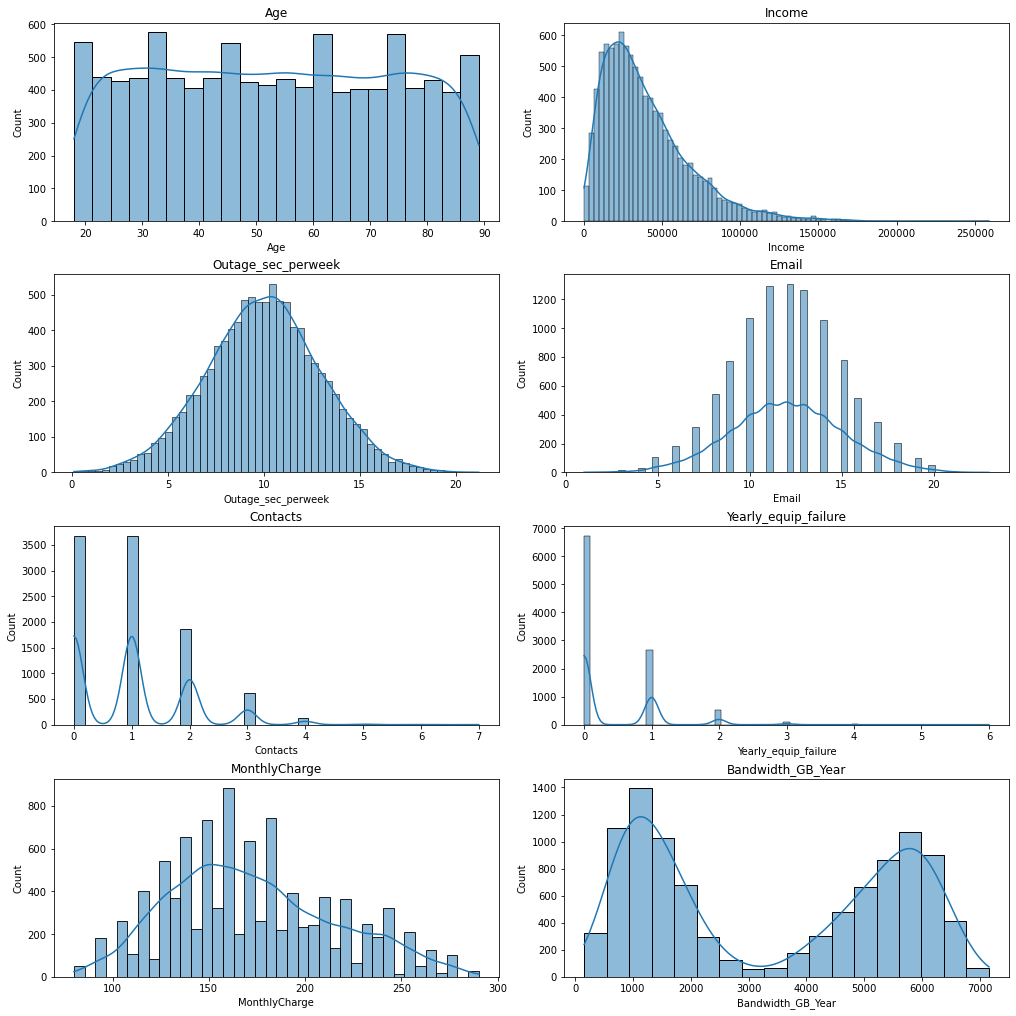

In [14]:
fig, axes = plt.subplots(4, 2, sharex=False, sharey=False, figsize=(14, 14), constrained_layout=True)

# plot each col onto one ax
for col, ax in zip(df_cont.columns, axes.flat):
    sns.histplot(df_cont[col], ax=ax, kde=True)
    ax.set_title(col)

# disable leftover axes
for ax in axes.flat[df_cont.columns.size:]:
    ax.set_axis_off()


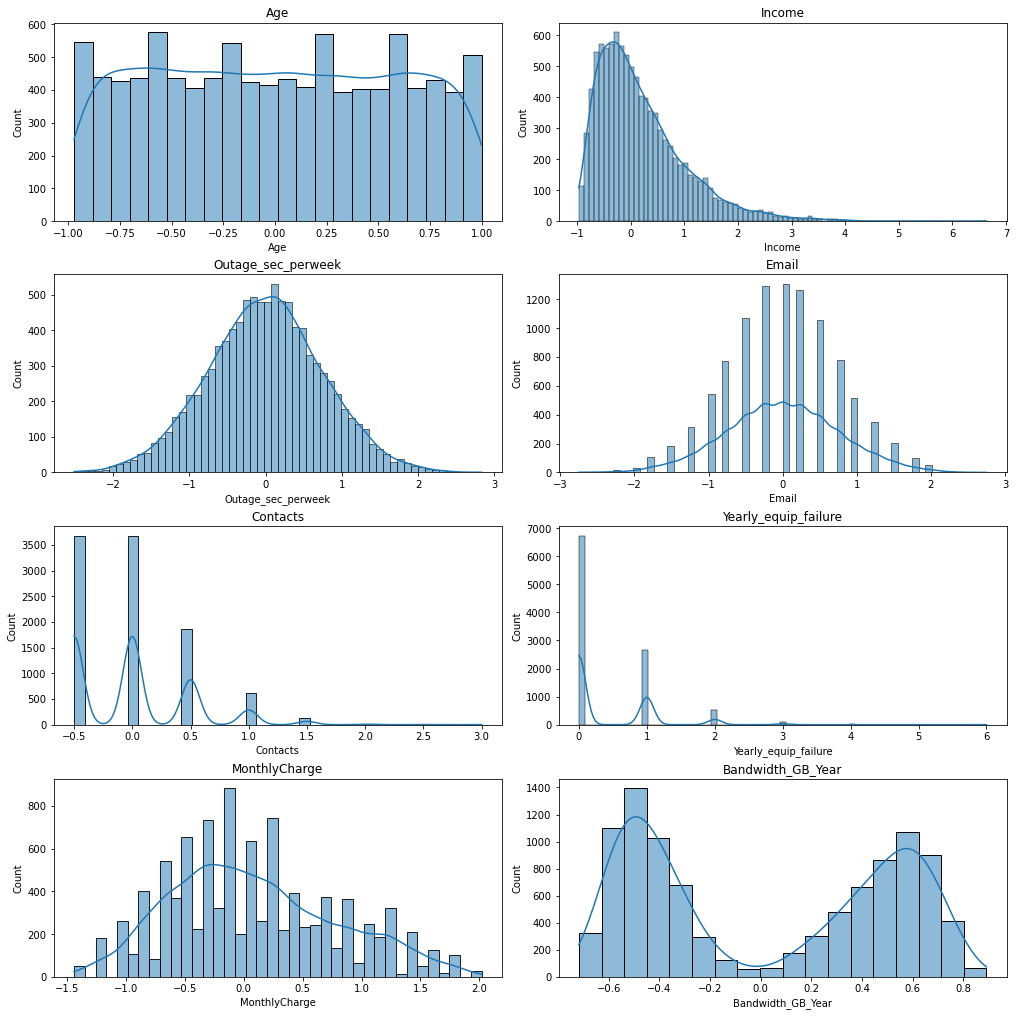

In [15]:
fig, axes = plt.subplots(4, 2, sharex=False, sharey=False, figsize=(14, 14), constrained_layout=True)

# plot each col onto one ax
for col, ax in zip(df_scaled.columns, axes.flat):
    sns.histplot(df_scaled[col], ax=ax, kde=True)
    ax.set_title(col)

# disable leftover axes
for ax in axes.flat[df_scaled.columns.size:]:
    ax.set_axis_off()

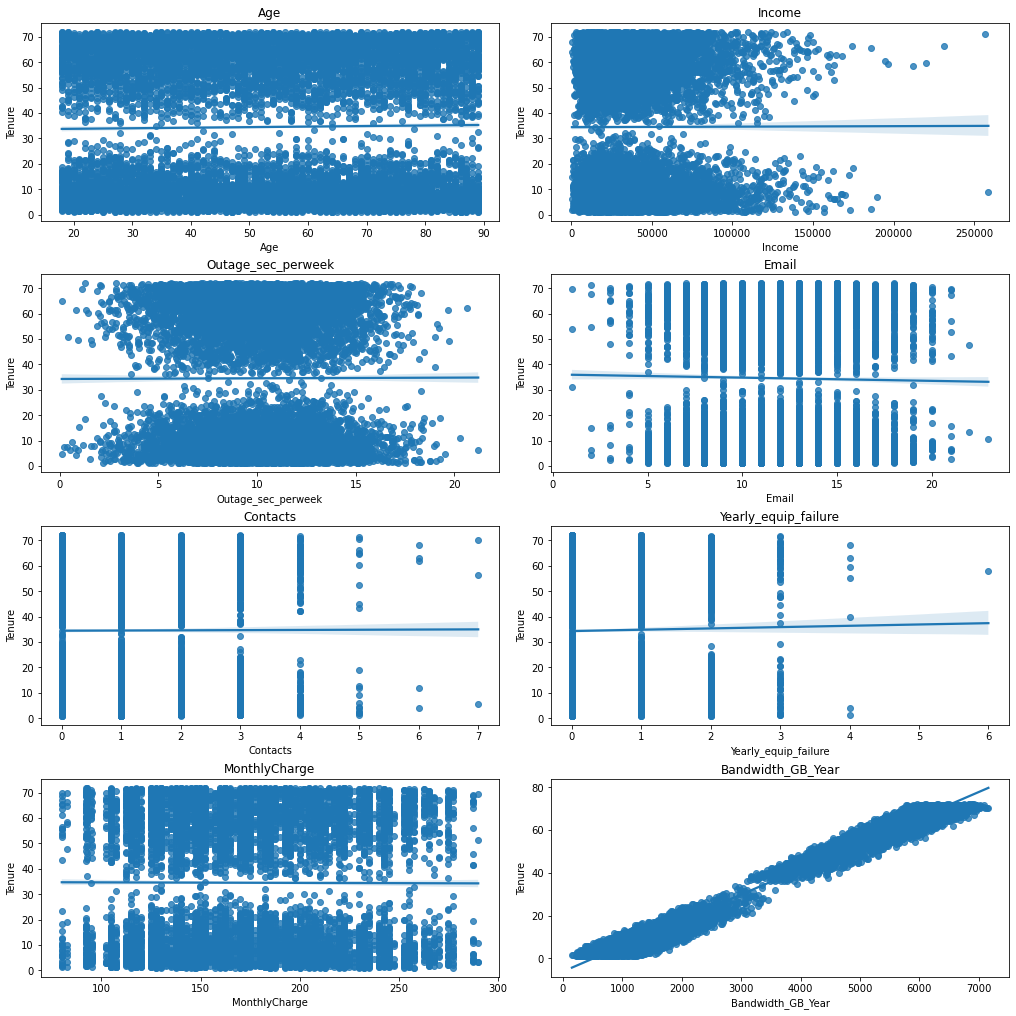

In [16]:
fig, axes = plt.subplots(4, 2, sharex=False, sharey=False, figsize=(14, 14), constrained_layout=True)

# plot each col onto one ax
for col, ax in zip(df_cont.columns, axes.flat):
    sns.regplot(x = df_cont[col], y=df['Tenure'], ax=ax)

    ax.set_title(col)

# disable leftover axes
for ax in axes.flat[df_cont.columns.size:]:
    ax.set_axis_off()

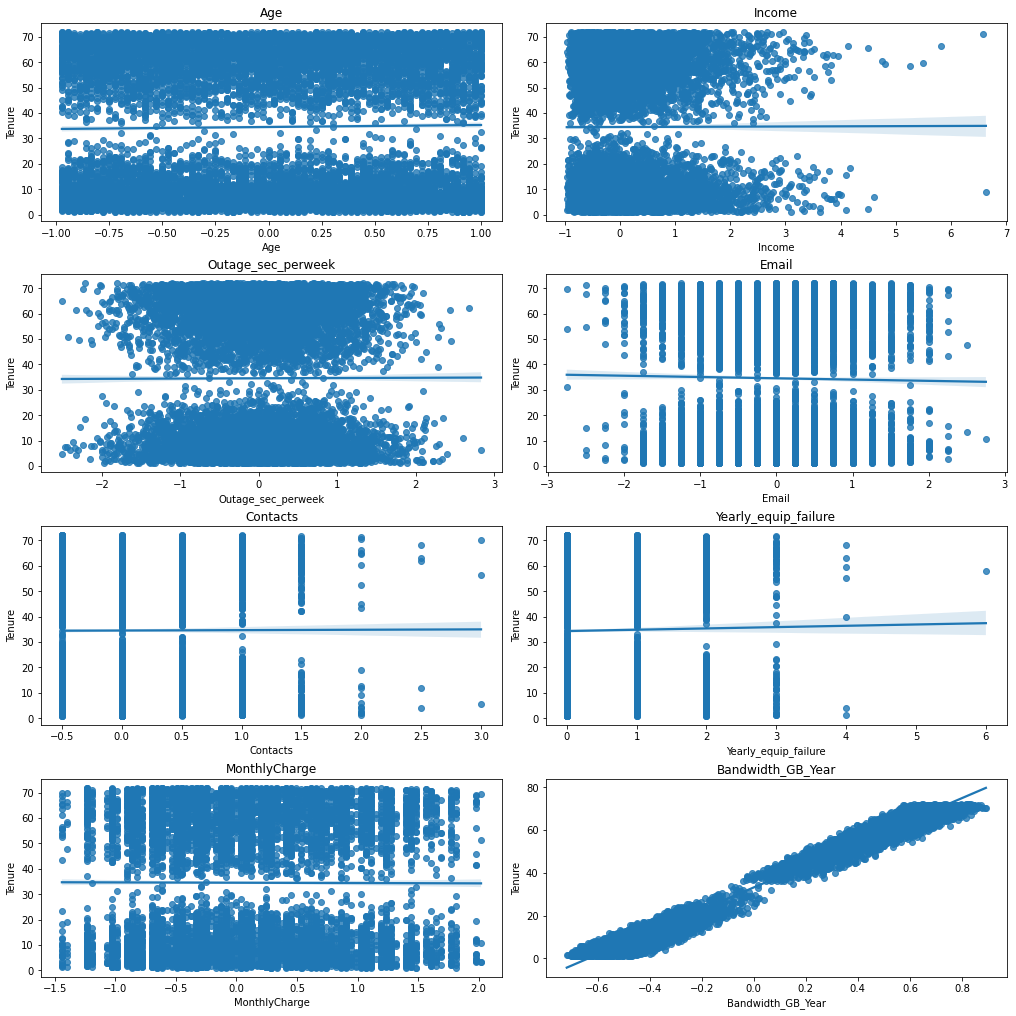

In [17]:
ax.set_axis_off()
fig, axes = plt.subplots(4, 2, sharex=False, sharey=False, figsize=(14, 14), constrained_layout=True)

# plot each col onto one ax
for col, ax in zip(df_scaled.columns, axes.flat):
    sns.regplot(x=df_scaled[col], y=df['Tenure'], ax=ax)

    ax.set_title(col)

# disable leftover axes
for ax in axes.flat[df_scaled.columns.size:]:
    ax.set_axis_off()


#### 5.  Provide a copy of the prepared data set.

In [18]:
df_scaled.to_csv('Churn_scaled_data.csv')

## Part IV: Model Comparison and Analysis

### D.  Compare an initial and a reduced multiple regression model by doing the following:

#### 1.  Construct an initial multiple regression model from all predictors that were identified in Part C2.

Note: The output should include a screenshot of each model.




In [19]:
# setting an intercept to 1, this ensure we can observe 0s with their appropriate impact on the model
df_scaled['intercept'] = 1

exp_cols = ['intercept', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
            'Yearly_equip_failure', 'MonthlyCharge','Bandwidth_GB_Year']

# linear regression
lm_tenure = sms.OLS(df_scaled['Tenure'], df_scaled[exp_cols])

# fit
tenure_results = lm_tenure.fit()

tenure_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.039e+05
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:17:00   Log-Likelihood:                 15035.
No. Observations:               10000   AIC:                        -3.005e+04
Df Residuals:                    9991   BIC:                        -2.999e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.0383      0.001    -58.802      0.000      -0.040      -0.037
Age                      0.0278      0.001     29.646      0.000       0.026       0.030
Income                  -0.0010      0.001     -1.465      0.143      -0.002       0.000
Outage_sec_perweek       0.0002      0.001      0.309      0.757      -0.001       0.002
Email                 7.057e-05      0.001      0.099      0.921      -0.001       0.001
Contacts                -0.0007      0.001     -0.628      0.530      -0.003       0.001
Yearly_equip_failure    -0.0002      0.001     -0.256      0.798      -0.002       0.001
MonthlyCharge           -0.0446      0.001    -58.436      0.000      -0.046      -0.043
Bandwidth_GB_Year        0.9786      0.001    911.405      0.000       0.976       0.981
==============================================================================
Omnibus:                     2859.125   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.230
Skew:                          -0.413   Prob(JB):                    4.02e-157
Kurtosis:                       1.976   Cond. No.                         2.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Check VIF
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('Tenure ~ Age + Income+Outage_sec_perweek + Email + Contacts + Yearly_equip_failure + MonthlyCharge + Bandwidth_GB_Year', df_scaled, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,1.462777,Intercept
1,1.000751,Age
2,1.000254,Income
3,1.000852,Outage_sec_perweek
4,1.000592,Email
5,1.000533,Contacts
6,1.000624,Yearly_equip_failure
7,1.004309,MonthlyCharge
8,1.004304,Bandwidth_GB_Year


In [21]:
pvs = round(tenure_results.pvalues, 3).to_dict()
pvs

{'intercept': 0.0,
 'Age': 0.0,
 'Income': 0.143,
 'Outage_sec_perweek': 0.757,
 'Email': 0.921,
 'Contacts': 0.53,
 'Yearly_equip_failure': 0.798,
 'MonthlyCharge': 0.0,
 'Bandwidth_GB_Year': 0.0}

In [22]:
significant_list = []

for key, val in pvs.items():
    if val < .05:
        significant_list.append(key)
        print(f'{key} is statistically significant in the model with a P-value of {val}')

print(significant_list)

intercept is statistically significant in the model with a P-value of 0.0
Age is statistically significant in the model with a P-value of 0.0
MonthlyCharge is statistically significant in the model with a P-value of 0.0
Bandwidth_GB_Year is statistically significant in the model with a P-value of 0.0
['intercept', 'Age', 'MonthlyCharge', 'Bandwidth_GB_Year']


#### 2.  Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

Taking the summary from above with an $a$ = 0.05, only a few values are statistically significant in the model. The reduced model will use the 4 features outlined in the print statement above. One of the significant features is the intercept that was added in.

#### 3.  Provide a reduced multiple regression model that includes both categorical and continuous variables.

In [23]:
# linear regression
lm_reduced = sms.OLS(df_scaled['Tenure'], df_scaled[significant_list])

# fit
reduced_results = lm_reduced.fit()

reduced_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.771e+05
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:17:00   Log-Likelihood:                 15034.
No. Observations:               10000   AIC:                        -3.006e+04
Df Residuals:                    9996   BIC:                        -3.003e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -0.0385      0.001    -71.052      0.000      -0.040      -0.037
Age                   0.0278      0.001     29.647      0.000       0.026       0.030
MonthlyCharge        -0.0446      0.001    -58.447      0.000      -0.046      -0.043
Bandwidth_GB_Year     0.9786      0.001    911.681      0.000       0.976       0.981
==============================================================================
Omnibus:                     2879.520   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.221
Skew:                          -0.412   Prob(JB):                    2.45e-157
Kurtosis:                       1.975   Cond. No.                         2.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
reduced_results.params

intercept           -0.038550
Age                  0.027757
MonthlyCharge       -0.044589
Bandwidth_GB_Year    0.978553
dtype: float64

### E.  Analyze the data set using your reduced multiple regression model by doing the following:

#### 1.  Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:

##### •  the logic of the variable selection technique

Choosing all continuous variables collected in this dataset, while introducing risk of over-fitting, was done in order to gleam insights into `Tenure` relationships that may have been missed. Using VIF and correlation scores there would always be a way to protect against introducing bias or reducing randomness in further analysis.


##### •  the model evaluation metric

After the continuous variables were scaled, determining statistical significance as reported by Statsmodels OLS summary and sublass attributes, those with $a$ < 0.05 would be selected for the paired down model. The 3 features (other than `Intercept`, which was added as a standard  MLR practice) all would pass more stringent significance levels.

The reduction in variables showed no difference in the Pearson score up to three significant figures, $R$<sup>2</sup> = 0.988 for adjust and non-adjusted. The probability of the F-statistic is near 0 as well indicating that the null hypothesis can be rejected and that there are features in the list subset that contribute to explaining the variance of `Tenure`.


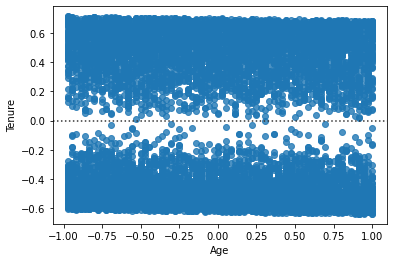

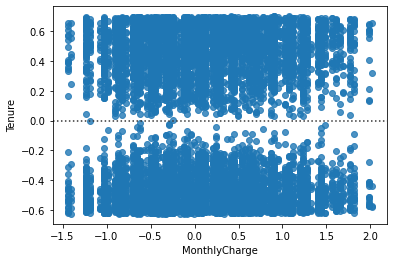

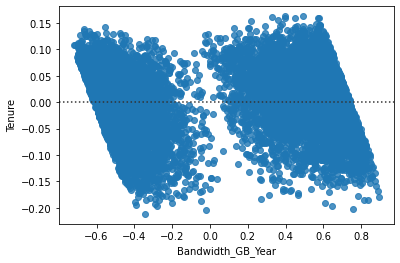

In [25]:
# a residual plot showing no risk of heteroscedasticity
for val in significant_list:
    if val == 'intercept':
        pass
    else:
        sns.residplot(x=val, y='Tenure', data=df_scaled)
        plt.show()

<AxesSubplot:ylabel='Tenure'>

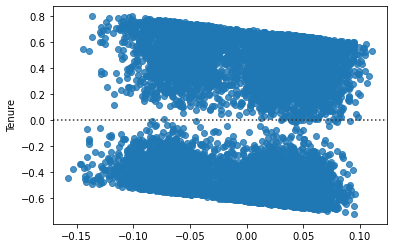

In [26]:
sns.residplot(x=reduced_results.resid, y=df_scaled['Tenure'])

<AxesSubplot:ylabel='Count'>

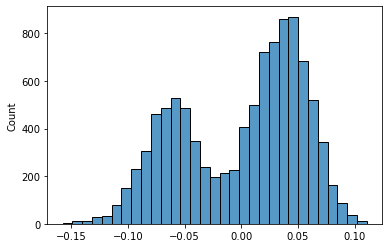

In [27]:
sns.histplot(reduced_results.resid)

In [28]:
np.absolute(reduced_results.resid).sum(), np.absolute(reduced_results.resid).mean(), np.absolute(reduced_results.resid).median()

(470.8302932041566, 0.04708302932041574, 0.04638711616178526)

#### 2.  Provide the output and any calculations of the analysis you performed, including the model’s residual error.


The residual error for the reduced model is available in the summary and graph above. The sum of residual error is 470 and the average residual error is 0.047 and mean of 0.046.


### 3.  Provide the code used to support the implementation of the multiple regression models.

Provided in-line and in relationship to each section.

## Part V: Data Summary and Implications

### F.  Summarize your findings and assumptions by doing the following:

#### 1.  Discuss the results of your data analysis, including the following elements:

##### •  a regression equation for the reduced model

print('The reduced model regression equation for `Tenure ~ Age + MonthlyCharge + Bandwidth_GB_Year including an intercept constat is as follows:\n')
print(f'Tenure = {round(reduced_results.params[1],2)}(Age) + {round(reduced_results.params[2],2)}(MonthlyCharge) + {round(reduced_results.params[1],3)}(Bandwidth_GB_Year) + {round(reduced_results.params[0],2)}')


##### •  an interpretation of coefficients of the statistically significant variables of the model

`Tenure` in months increases with `Bandwidth` and `Age`. `MonthlyCharge` has a negative effect on `Tenure` and as charge increases tenure decreases. The negative effect of `MonthlyCharge` outweights the other 2 features in the reduced model on their own meaning age or bandwidth usage are not as powerful as cost in customers staying long term.

##### •  the statistical and practical significance of the model

This model has an extremely high $R$<sup>2</sup> and P-value rejecting the null stated at the beginning of the analysis. This model allows the practical step of analyzing payment rates to mitigate the risk `MonthlyCharge` poses to the tenure of customers.

##### •  the limitations of the data analysis

This dataset does have major limitations in that many continuous features were self reported by the customers. From CFO's that are 19 with 4 children making 35k USD a year and a Tour manager maing over 200k. Until compared to another dataset or significantly cleaned, these results cannot be verified as accurate. THough RobustScaler was used to mitigate these discrepancies, no customer information can be considered reliable with the collection methods used.

#### 2.  Recommend a course of action based on your results.

My recommendation, due to the major limitations of the dataset is to collect new data or compare with another subset of customers to limit the above limitations before further modeling or anaylsis can be done.

If moving forward with this regression model, I recommend a secondary logistic regression model on churn. Combining a logistic churn model with this regression model can help identify likely churners and adjust their monthly charge.



In [30]:
!export PATH=/Library/TeX/texbin:$PATH
!jupyter nbconvert D208LinReg.ipynb --to webpdf

[NbConvertApp] Converting notebook D208LinReg.ipynb to webpdf
[NbConvertApp] Writing 1047778 bytes to D208LinReg.pdf
